## Exp 3: a simple classifier with the barcode dataset
### The training data is less than 10 classes
### The output layer is a regression layer

In [1]:
from __future__ import print_function
from __future__ import absolute_import
import matplotlib.pyplot as plt

import sugartensor as tf
import os
from IPython.display import display, Image
import numpy as np
from scipy import ndimage
from six.moves import cPickle as pickle

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"
%matplotlib inline


In [2]:
batch_size = 1   # batch size
image_size = 64
pixel_depth = 255.0

## Training data

In [3]:
dir= "barcode/train/"
fn = os.listdir(dir)
total = len(fn)
total
#     change the range to switch between exp2 : [0, 1, 2, 3, 4, 5, 6]
#     and exp2.1: [1, 3, 5, 7, 9]
visible = [1, 2, 4, 7]
# put all the images into this blob of size total*size*size*1
# REMEMBER to change shape of dataset
training_dataset = np.ndarray(shape = (300*len(visible), image_size, image_size, 1), dtype = np.float32)
counter = 0
# REMEMBER to change shape of training label
training_label = np.ndarray(shape = (300*len(visible)), dtype = np.float32)
for file in fn:
#     image_data = ndimage.imread(dir+file).astype(float)
    image_data = (ndimage.imread(dir+file).astype(float) - 250) / pixel_depth
    label = int(file.split("_")[0])
    if label in visible:
        training_label[counter] = int(file[0])
        training_dataset[counter, :, :] = image_data[:,:,0].reshape(image_size, image_size, 1)
        counter+=1
#     else:
#         print(file[0])
print(np.sum(training_dataset)/(300*len(visible)*image_size*image_size))
print(len(training_label))
training_image, training_label = tf.sg_data._data_to_tensor([training_dataset, training_label], batch_size, name = "train")
print(training_label)
print(training_image)
print(counter)

0.000381204535564
1200
Tensor("train_1:1", shape=(1,), dtype=float32)
Tensor("train_1:0", shape=(1, 64, 64, 1), dtype=float32)
1200


In [4]:
print(training_dataset[0])

[[[ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]
  ..., 
  [ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]]

 [[ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]
  ..., 
  [ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]]

 [[ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]
  ..., 
  [ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]]

 ..., 
 [[ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]
  ..., 
  [ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]]

 [[ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]
  ..., 
  [ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]]

 [[ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]
  ..., 
  [ 0.01960784]
  [ 0.01960784]
  [ 0.01960784]]]


## Validation data

4500
[ 8.  1.  1.  7.  1.  1.  2.]
[[[ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 [[ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 [[ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 ..., 
 [[-0.20784314]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 [[-0.20784314]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 [[-0.20784314]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]]
[[[ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 [[ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 [[ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]
  ..., 
  [ 0.08627451]
  [ 0.08627451]
  [ 0.08627451]]

 ...

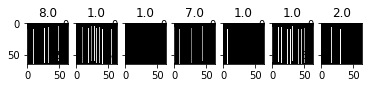

In [5]:
dir= "barcode/valid/"
fn = os.listdir(dir)
total = len(fn)
total
valid_label = np.ndarray(shape = (total), dtype = np.float32)
valid_dataset = np.ndarray(shape = (total, image_size, image_size, 1), dtype = np.float32)
counter = 0
for file in fn:
    image_data = (ndimage.imread(dir+file).astype(float) - 
                    233) / pixel_depth
    if True:
        valid_label[counter] = int(file[0])
        valid_dataset[counter, :, :] = image_data[:,:,0].reshape(image_size, image_size, 1)
        counter+=1
print(len(valid_label))

_, axs = plt.subplots(1, 7)

label = valid_label[:7]
image = valid_dataset[:7]
print(label)
for i in range(7):
    print(image[i])
    axs[i].imshow(image[i].reshape(image_size, image_size), cmap=plt.cm.Greys);
    axs[i].set_title(label[i])

valid_image, valid_label = tf.sg_data._data_to_tensor([valid_dataset, valid_label], batch_size, name = "train")

print(valid_label)
print(valid_image)

In [6]:
# input images and label
x = training_image
y = training_label

with tf.sg_context(name='discriminator', size=4, stride=2, act='leaky_relu'):
        
        # shared part
        # have to set batch norm at the layer level because we dont want to use batch norm everywhere
        shared = (x              
                  .sg_conv(dim=32, name = 'conv1')
                  .sg_conv(dim=64, name = 'conv2')
                  .sg_conv(dim=128, name='conv3')
                  .sg_flatten()
                  .sg_dense(dim = 1024, name = 'fc2')
                  .sg_dense(dim=10, act='linear', name = 'cat'))
        print(shared)
#         add kernel trick
        kernel = tf.concat([tf.pow(shared, 2), shared], 1)
        logit = (kernel.sg_dense(dim=1, act = 'linear', name = 'output'))

Tensor("discriminator/cat/out:0", shape=(1, 10), dtype=float32)


In [7]:
print(kernel)
print(logit)
print(y)
loss = logit.sg_mse(target = y, name = 'disc_loss')
# loss = tf.reduce_sum(tf.pow(y-logit, 2), name = "disc_loss")/(2*batch_size)
print(loss)
# limit gpu
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)


sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.sg_init(sess)

# sess.run(logit)
# print(logit)
# sess.run(loss)
# print(loss)
#
# training
#
# accuracy evaluation
# acc = (logit.sg_reuse(input = valid_image).sg_int().sg_one_hot(depth = 10)
#        .sg_accuracy(target=valid_label, name='val'))
# do training

# tf.sg_train(optim = 'Adam', sess = sess,  lr = 0.001, loss = loss, log_interval=5, max_ep=900, ep_size=300*len(visible)//batch_size, early_stop=False, save_dir='asset/train/exp3-classifier')
# print("change learning rate")
# tf.sg_train(optim = 'Adam', sess = sess,  lr = 0.01, loss = loss, log_interval=5, max_ep=120, ep_size=3000*len(visible)//batch_size, early_stop=False, save_dir='asset/train/exp3-classifier')
# print("change learning rate")
tf.sg_train(optim = 'Adam', sess = sess,  lr = 0.0001, loss = loss, log_interval=5, max_ep=180, ep_size=180*len(visible)//batch_size, early_stop=False, save_dir='asset/train/exp3.2-classifier')

Tensor("discriminator/concat:0", shape=(1, 20), dtype=float32)
Tensor("discriminator/output/out:0", shape=(1, 1), dtype=float32)
Tensor("train_1:1", shape=(1,), dtype=float32)
Tensor("mse:0", shape=(1, 1), dtype=float32)
INFO:tensorflow:global_step/sec: 0


train:  25%|█████▉                  | 177/720 [00:00<00:01, 347.29b/s]

INFO:tensorflow:global_step/sec: 186.146


train:  46%|███████████▏            | 334/720 [00:01<00:01, 298.72b/s]

INFO:tensorflow:global_step/sec: 320.403


train:  80%|███████████████████▎    | 578/720 [00:01<00:00, 376.97b/s]

INFO:tensorflow:global_step/sec: 334.591


train:  17%|████                    | 120/720 [00:00<00:01, 394.42b/s]

INFO:tensorflow:global_step/sec: 337.808


train:  55%|█████████████▎          | 399/720 [00:02<00:02, 125.08b/s]

INFO:tensorflow:global_step/sec: 198.187


train:  57%|█████████████▊          | 414/720 [00:02<00:02, 107.20b/s]

INFO:tensorflow:global_step/sec: 146.139


train:  60%|██████████████▍         | 432/720 [00:01<00:01, 160.63b/s]

INFO:tensorflow:global_step/sec: 292.715


train:  72%|█████████████████▍      | 522/720 [00:01<00:00, 388.97b/s]

INFO:tensorflow:global_step/sec: 305.43


train:   5%|█▎                       | 36/720 [00:00<00:01, 357.98b/s]

INFO:tensorflow:global_step/sec: 335.208
